<a href="https://colab.research.google.com/github/khanhtran94/LearnConda/blob/master/scalr_garder_desicen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2019-02-26 15:22:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.7.169.168, 52.45.248.161, 52.45.111.123, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.7.169.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]   5.11M  3.48MB/s    in 1.5s    

2019-02-26 15:22:08 (3.48 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [5363700/5363700]



In [0]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://891ec061.ngrok.io


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
learning_parameter = 0.01
epochs = 300

In [0]:
sample_points = 50

x_train = np.linspace(0,30,sample_points)
y_train = 6 * x_train + 7*np.random.randn(sample_points)

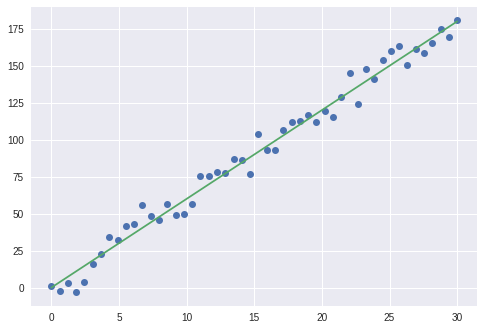

In [0]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train,6*x_train)
plt.show()

In [0]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
with tf.name_scope("Model") as scope:
  prediction = W*X + B

weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)


In [0]:
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)
  
cost_summary = tf.summary.scalar("Cose", cost_iteration)

In [0]:
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

init = tf.global_variables_initializer()
merger_summary = tf.summary.merge_all()

Instructions for updating:
Use tf.cast instead.


Epochs 0.000000 cost 0.717011 Weight 5.718589 Bias 0.626070
Epochs 40.000000 cost 0.024566 Weight 5.949115 Bias 0.610543
Epochs 80.000000 cost 0.024432 Weight 5.950189 Bias 0.582638
Epochs 120.000000 cost 0.024311 Weight 5.951160 Bias 0.557370
Epochs 160.000000 cost 0.024202 Weight 5.952040 Bias 0.534490
Epochs 200.000000 cost 0.024102 Weight 5.952837 Bias 0.513770
Epochs 240.000000 cost 0.024013 Weight 5.953559 Bias 0.495009
Epochs 280.000000 cost 0.023932 Weight 5.954212 Bias 0.478020


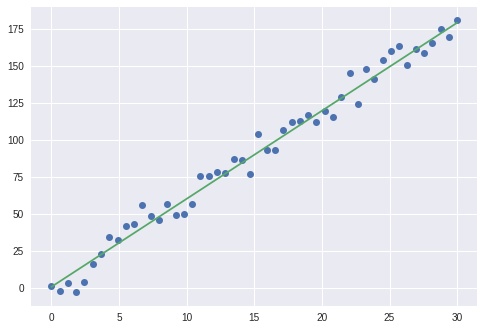

In [0]:
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter("./log", sess.graph)
  
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X: x, Y: y})
      
      summary_epochs = sess.run(merger_summary, feed_dict = {X: x, Y: y})
      writer.add_summary(summary_epochs, epoch)
      
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X: x, Y: y})
      print('Epochs %f cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
      
  Weight = sess.run(W)
  Bias = sess.run(B)
  
  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight*x_train+Bias)
  plt.show()